In [13]:
import numpy as np
import matplotlib.pyplot as plt
from modules.Particle import Particle
from modules.Direct_Classes import Direct
from modules.FMM_Classes import FMM
from modules.Analytic_Classes import SingleParticle
%load_ext autoreload
%autoreload 2
from modules.testing import PointTesting
from modules.testing import plot_difference
import copy


# Create particle distribution to be used in all simulations
#np.random.seed(100)
n_particles = 1000
max_property = 1 # property could be mass or charge 
box_size = 1000

# Generate initial particles
#initial_positions = np.random.beta(2,2,(n_particles,2)) * box_size
# initial_positions=[]
# for x in np.linspace(0, box_size, int(np.sqrt(n_particles)), False):
#     for y in np.linspace(0, box_size, int(np.sqrt(n_particles)), False):
#         initial_positions.append(np.array([x, y])) 
# initial_positions = np.array(initial_positions)
# print(initial_positions)
initial_positions = np.random.uniform(0,1,(n_particles,2)) * box_size

initial_particles = []
for initial_position in initial_positions:
    initial_particles.append(Particle(initial_position, np.random.uniform(0,max_property)))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1000
-32824.67650927633


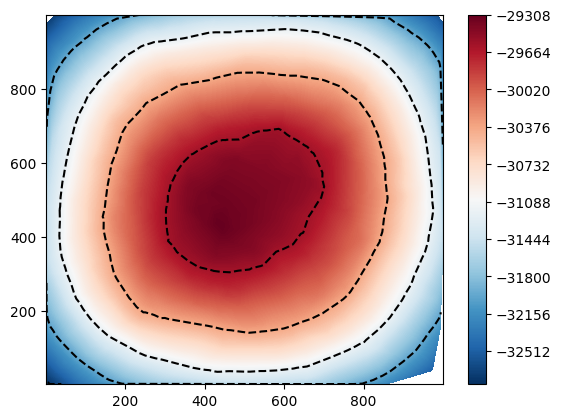

In [14]:
# direct Simulation
direct_particles = copy.deepcopy(initial_particles)
direct_simulation = Direct(box_size, direct_particles)
direct_simulation.run()
direct_simulation.plot_potential()

1
fine 5 [0, 0] [15.625 15.625]
[5.076388293416403, -85.1059336038278, -730.7216267566494, -8510.789367710786, -112858.7226665817, -1609332.9978520835, -24034030.547456708, -370495459.7669968, -5843876537.58609, -93780691211.63583, -1525265096369.429, -25073596298487.53, -415785600500941.7, -6944855597490371.0, -1.1671005892022373e+17, -1.9716165508240003e+18, -3.3458143288025494e+19, -5.70034056934771e+20, -9.745808837894002e+21]
fine 5 [0, 1] [15.625 46.875]
[4.413199114040607, -74.55031116227755, -629.6734807081792, -7091.205677091385, -89841.5598439064, -1214124.460481975, -17091410.331395622, -247472559.11488658, -3657893363.345739, -54925555289.76563, -835050814300.8994, -12823782895102.154, -198574525803810.78, -3096402190519970.5, -4.857005785669075e+16, -7.657752673206523e+17, -1.2127423677793921e+19, -1.928126615398744e+20, -3.076152799068119e+21]
fine 5 [0, 3] [ 15.625 109.375]
[9.190383586999104, -106.48812820089711, -627.204013709177, -4972.759169420175, -44594.67501356503

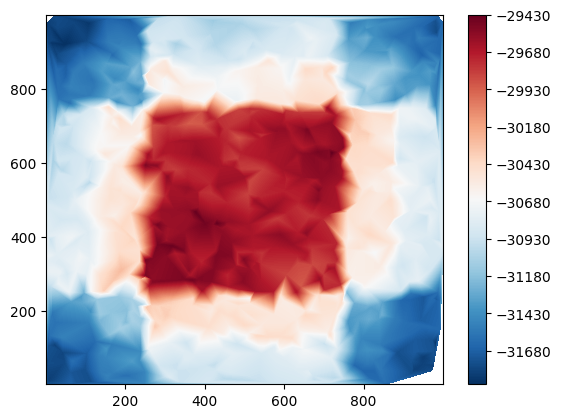

In [15]:
# FMM Simulation
expansion_order = 18
fmm_particles = copy.deepcopy(initial_particles)
fmm_simulation = FMM(box_size, expansion_order, fmm_particles)
fmm_simulation.run()
fmm_simulation.plot_potential()

[-169.27190381692344, 161.08752418374934, -328.31895226186316, -30.730608523244882, -3.453508217331546, 49.024591956462245, 737.5034697064984, 45.718555252697115, -713.701789256902, -125.60186829656595, 163.7517090853762, 111.81724511313223, -623.7481149623891, -260.7918693220345, -56.41194417523002, 393.54227150763836, 765.60660334575, 367.37671630332625, -194.08558109869773, 348.8243821447104, 39.94678918120189, 316.142898708491, 241.5474137293677, 124.88489073389792, -305.85671047136566, 283.32866499532975, -761.9843995309348, -682.1455928971809, 398.65089263455593, 470.2174617637356, 304.64303684339393, -139.04768502981824, 386.88759385326193, -4.778664406352618, -23.801313248750375, -635.2657829690361, 99.71302664500399, 693.3002676529795, -197.45794977012338, -685.2391925518641, -160.19320930407412, 262.28714839698296, 472.93324020390355, 623.2763754787702, 401.3787574177077, -612.604728770315, -119.6794921443543, 306.1319591436295, -3.9257204111381725, 82.26052860188793, -365.95

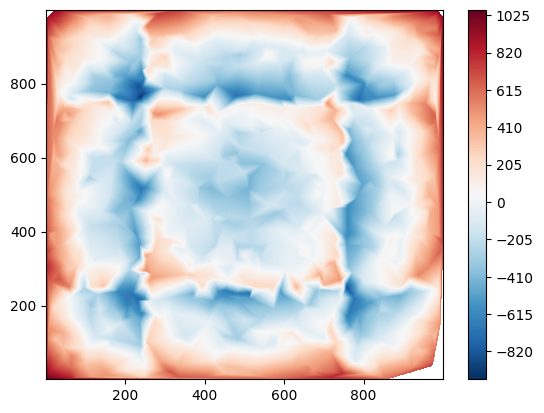

In [16]:
plot_difference(fmm_particles, direct_particles)